# About the Data (from [here](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95))

The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage (https://www.nhtsa.gov/sites/nhtsa.dot.gov/files/documents/ny_overlay_mv-104an_rev05_2004.pdf). It should be noted that the data is preliminary and subject to change when the MV-104AN forms are amended based on revised crash details.For the most accurate, up to date statistics on traffic fatalities, please refer to the NYPD Motor Vehicle Collisions page (updated weekly) or Vision Zero View (updated monthly).


Due to success of the CompStat program, NYPD began to ask how to apply the CompStat principles to other problems. Other than homicides, the fatal incidents with which police have the most contact with the public are fatal traffic collisions. Therefore in April 1998, the Department implemented TrafficStat, which uses the CompStat model to work towards improving traffic safety. Police officers complete form MV-104AN for all vehicle collisions. The MV-104AN is a New York State form that has all of the details of a traffic collision. Before implementing Trafficstat, there was no uniform traffic safety data collection procedure for all of the NYPD precincts. Therefore, the Police Department implemented the Traffic Accident Management System (TAMS) in July 1999 in order to collect traffic data in a uniform method across the City. TAMS required the precincts manually enter a few selected MV-104AN fields to collect very basic intersection traffic crash statistics which included the number of accidents, injuries and fatalities. As the years progressed, there grew a need for additional traffic data so that more detailed analyses could be conducted. The Citywide traffic safety initiative, Vision Zero started in the year 2014. Vision Zero further emphasized the need for the collection of more traffic data in order to work towards the Vision Zero goal, which is to eliminate traffic fatalities. Therefore, the Department in March 2016 replaced the TAMS with the new Finest Online Records Management System (FORMS). FORMS enables the police officers to electronically, using a Department cellphone or computer, enter all of the MV-104AN data fields and stores all of the MV-104AN data fields in the Department’s crime data warehouse. Since all of the MV-104AN data fields are now stored for each traffic collision, detailed traffic safety analyses can be conducted as applicable.


In [1]:
import pandas as pd
import time
import numpy as np
import calendar
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

df = pd.read_csv('preprocessed_collisions.csv')
df['AnyInjured'] = (df['NUMBER OF PERSONS INJURED'] > 0).astype(int)
df['AnyKilled']  = (df['NUMBER OF PERSONS KILLED'] > 0).astype(int)

df['TIME'] = pd.to_datetime(df['TIME'], format='%Y-%m-%d %H:%M:%S')

/Users/Marie/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (7,8,9,22,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Why does it happen?

In [23]:
plot1 = pd.DataFrame(df.groupby(df['CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index().values, columns=['First Contributing Factor','Count'])
plot1 = plot1[(plot1.Count > 47000)] 
fig = px.bar(plot1, y = 'First Contributing Factor', x = 'Count', orientation = "h")
fig.update_layout(yaxis={'categoryorder':'total ascending'},
    title="Top five main contributing factor from motor vehical collisions from 2014 - 2020",
    xaxis_title="Number of collisions",
    hoverlabel_font_color='White')
fig.update_traces(
    hovertemplate="<br>".join([
        "Contributing Factor: %{y}",
        "Total number of collisions: %{x:,}",]
    ),
    selector=dict(type="bar"),
    marker_color='rgb(43,174,128)'
)

fig.show()

fig.write_html("plotly_html/collisions_contributing_factor.html")

In the plot above we can see that the number one main contributing factor is 'Unspecified' with over 500.000 record over that last seven year. This could suggets that the NYPD still has some trouble getting used to 'MV-104AN' and the Finest Online Records Management System (FORMS), which where introduced in 2016. The second largest main contributing factor is 'Driver inattantion/Distration', which is also a seperate sub-topic that we have studied more closely on the website. 

## Where does it happen?

In [20]:
plot2 = pd.DataFrame(df.groupby(df['BOROUGH']).size().reset_index().values, columns=['Borough','Count'])
plot2['citizen_N'] = pd.Series([1435000, 2590000, 1632000, 2287000 ,474893])
plot2['area m^2'] = pd.Series([110, 180,  59, 280 ,152])

fig = px.bar(plot2, x = 'Borough', y = 'Count', custom_data = plot2[['Borough', 'Count', 'citizen_N','area m^2']])

fig.update_layout(xaxis={'categoryorder':'total descending'},
    title="Toal number of collisions in each borough from 2014 - 2020",
    xaxis_title="Borough",
    yaxis_title="Number of collisions",
    hoverlabel_font_color='White')

fig.update_traces(
    hovertemplate="<br>".join([
        "Borough: %{x}",
        "Total number of collisions: %{y:,}",
        "Population (2019): %{customdata[2]:,}",
        "Area in m^2: %{customdata[3]:,} "]

    ),
    selector=dict(type="bar"),
    marker_color='rgb(43,174,128)'
)

fig.show()
fig.write_html("plotly_html/collisions_borough.html")

We can see that the borough with the largest number of motor vehical collisions the last seven years is Brooklyn with more than 400.000 collisions. Second is Queens. Two things to notice are the number of citisen and size of the area, because Brooklyn and Queens migth be the borough with the highest number of collisions, but they are also the most populated and largest area respectively. However we still get a good understanding of the distribution.

__[Brooklyn Wikipedia](https://en.wikipedia.org/wiki/Brooklyn)__ <br>
__[Queens Wikipedia](https://en.wikipedia.org/wiki/Queens)__  <br>
__[Manhattan Wikipedia](https://en.wikipedia.org/wiki/Manhattan)__  <br>
__[Bronx Wikipedia](https://en.wikipedia.org/wiki/The_Bronx)__ <br>
__[Staten Island Wikipedia](https://en.wikipedia.org/wiki/Staten_Island)__ 

## When does it happen?

In [21]:
df['CRASH TIMESTAMP'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'], format='%m/%d/%Y %H:%M')

In [28]:
plot3= pd.DataFrame(df.groupby(df['CRASH TIMESTAMP'].dt.weekday).size().reset_index().values, columns=['Day of the Week','Count'])
plot3['change'] = plot3['Count'].pct_change().fillna(0)*100

fig = px.bar(plot3, x =["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"], y = 'Count',
            custom_data = plot3[['Day of the Week', 'Count', 'change']])
fig.update_layout(
    title="Number of collisions each day of the week from 2014 - 2020",
    xaxis_title="Day of the week", 
    yaxis_title="Number of collisions",
    hoverlabel_font_color='White')
fig.update_traces(
    hovertemplate="<br>".join([
        "Day of the week: %{x}",
        "Total number of collisions: %{y:,}",
        "Day-to-day change: %{customdata[2]:.2f} %"]
    ),
    selector=dict(type="bar"),
    marker_color='rgb(43,174,128)'
)

fig.update_layout()
fig.show()
fig.write_html("plotly_html/collisions_day.html")

The number collisions out of the seven weekday are highest on Fridays and lowest on Sundays. We can see that the change from day to day variation is not great, with the higest difference being from Friday to Saturday with a decrease of nearly 20%. 

In [27]:
plot4 = pd.DataFrame(df.groupby(df['CRASH TIMESTAMP'].dt.month).size().reset_index().values, columns=['Month','Count'])
fig = px.bar(plot4, x =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], y = 'Count')
fig.update_layout(
    title="Number of collisions per month" ,
    xaxis_title="Month",
    yaxis_title="Number of collisions",
    hoverlabel_font_color='White')
fig.update_traces(
    hovertemplate="<br>".join([
        "Month: %{x}",
        "Total number of collisions: %{y:,}",
    ]),
    selector=dict(type="bar"),
    marker_color='rgb(43,174,128)'
)

fig.show()
fig.write_html("plotly_html/collisions_month.html")

In [51]:
plot5 = pd.DataFrame(df.groupby(df['CRASH TIMESTAMP'].dt.year).size().reset_index().values, columns=['Year','Count'])
# Yearly change 
plot5['change'] = plot5['Count'].pct_change().fillna(0)*100

fig = px.bar(plot5, x ='Year', y = 'Count', custom_data = plot5[['Year', 'Count', 'change']])

fig.update_layout(
    title="Number of collisions per year" ,
    xaxis_title="Year",
    yaxis_title="Number of collisions",
    hoverlabel_font_color='White')

fig.update_traces(
    hovertemplate="<br>".join([
        "Year: %{x}",
        "Total number of collisions: %{y:,}",
        "Year-to-year change: %{customdata[2]:.2f} %"
    ]),
    selector=dict(type="bar"),
    marker_color='rgb(43,174,128)'
)
fig.add_annotation(x=2014, y=191000,
            text="Vision Zero start" ,
            showarrow=False,
            yshift=10)
fig.add_annotation(x=2019, y=187000,
            text="Was it worth it?" ,
            showarrow=True,
            yshift=10)
fig.add_annotation(x=2014, y=165000,
            text="Your Choice matter" ,
            showarrow=True,
            yshift=10)

fig.add_annotation(x=2016, y=183500,
            text="Choices" ,
            showarrow=True,
            yshift=10)

fig.show()



fig.write_html("plotly_html/collisions_year.html")

We have in the plot above, beside showing the total number of collisions per year, also marked some of Vision Zero's campagin troughout the last seven years. Looking at the plot it does not show that the campaigns have had an effect, if only looking at the total number of collisions per year. One have to be aware that eventhough one migth think that the campaign 'Was it worth it', have had an extremly large effect reducing the number of collisions with 46.46 % from 2019 to 2020, one have to keep in mind that NYC, just like the rest of the world, suffered greatly from the world pandamic Covid-19. 

__[Vision Zero: Previous Awareness Campaigns](https://www1.nyc.gov/html/dot/html/about/campaigns.shtml)__ 

In [56]:
plot5 = pd.DataFrame(df.groupby(df['CRASH TIMESTAMP'].dt.hour).size().reset_index().values, columns=['Hour','Count'])
plot5['Hour'] = plot5['Hour'].astype(str).str.zfill(2)
plot5['change'] = plot5['Count'].pct_change().fillna(0)*100

fig = px.bar(plot5, x ='Hour', y = 'Count', custom_data = plot5[['Hour', 'Count', 'change']])

fig.update_layout(
    title="Number of collisions each hour of the day from 2014 - 2020" ,
    xaxis=dict(
        title='Hour of the day',
        tickmode='linear'),
    yaxis_title="Number of collisions",
    hoverlabel_font_color='White')

fig.update_traces(
    hovertemplate="<br>".join([
        "Hour of the day: %{x}",
        "Total number of collisions: %{y:,}",
        "Hour-to-Hour change: %{customdata[2]:.2f} %"
    ]),
    selector=dict(type="bar"),
    marker_color='rgb(43,174,128)'
)

fig.show()
fig.write_html("plotly_html/collisions_hour.html")

In the plot above we can see that most of the collisions happen around 4 o'clock in the afternoon. This is a classic rush hour bottleneck problem, where everyone is off from school or work, and want to get home fast to start their enjoyable time off. The means that there will of course be more cars on the road it this point than at 02 o'clock in the night for instance. We will talk about this 'curse of rush hour' below, and how we have taking it into considerations. 

## Jitter Plot

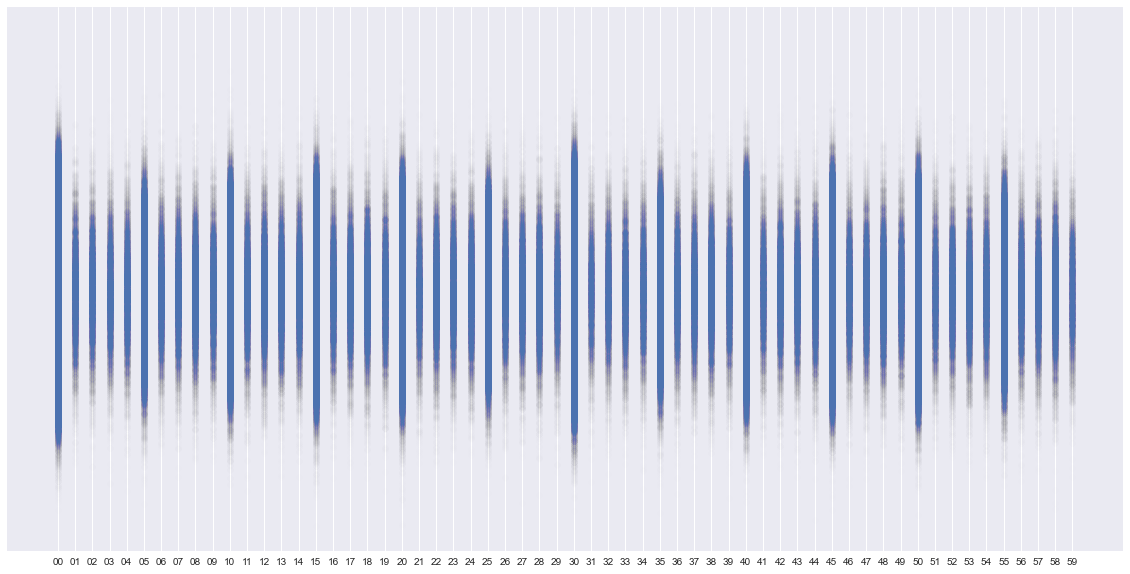

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(df['CRASH TIMESTAMP'].dt.minute, np.random.randn(len(df))+np.ones(len(df)), alpha=.005)
plt.xticks(np.arange(0, 60, 1), [str(x).zfill(2) for x in np.arange(0, 60, 1)])
plt.yticks([])
plt.show()

## When do serious / or lethal crashes occur?

Here, a serious crash is defined as a crash where a person is injured or killed.

In [13]:
df_serious = df.loc[(df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']) > 0]
df_lethal = df.loc[df['NUMBER OF PERSONS KILLED'] > 0]

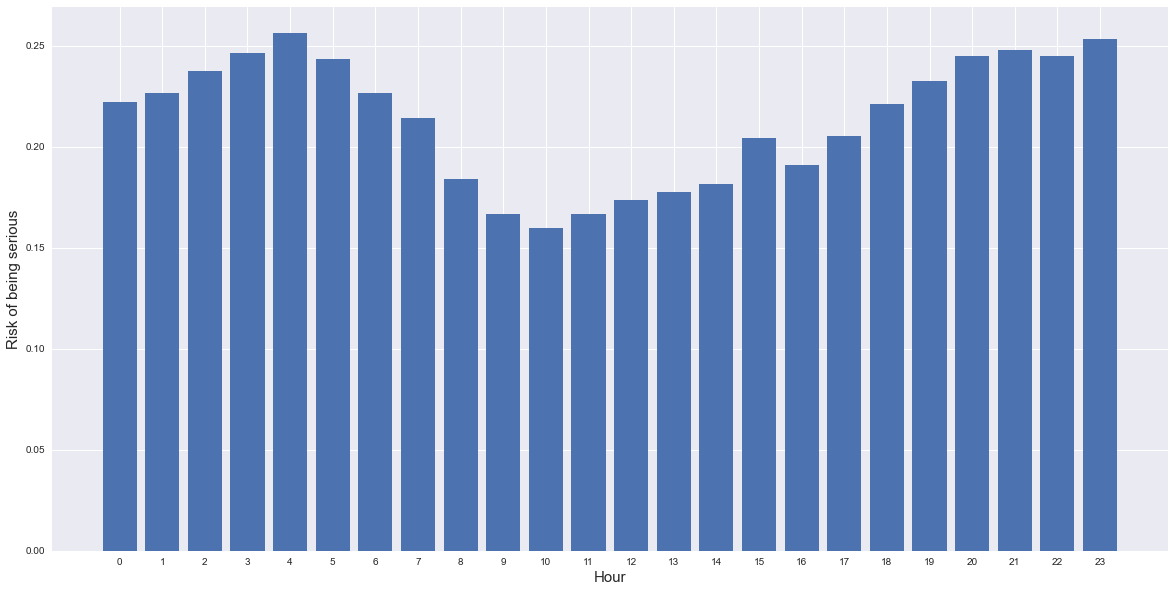

In [14]:
plt.figure(figsize=(20,10))
plt.bar(range(0, 24), df_serious.groupby(df_serious['CRASH TIMESTAMP'].dt.hour).size() / df.groupby(df['CRASH TIMESTAMP'].dt.hour).size())
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Risk of being serious', fontsize=15)
plt.xticks(range(0,24))
plt.show()

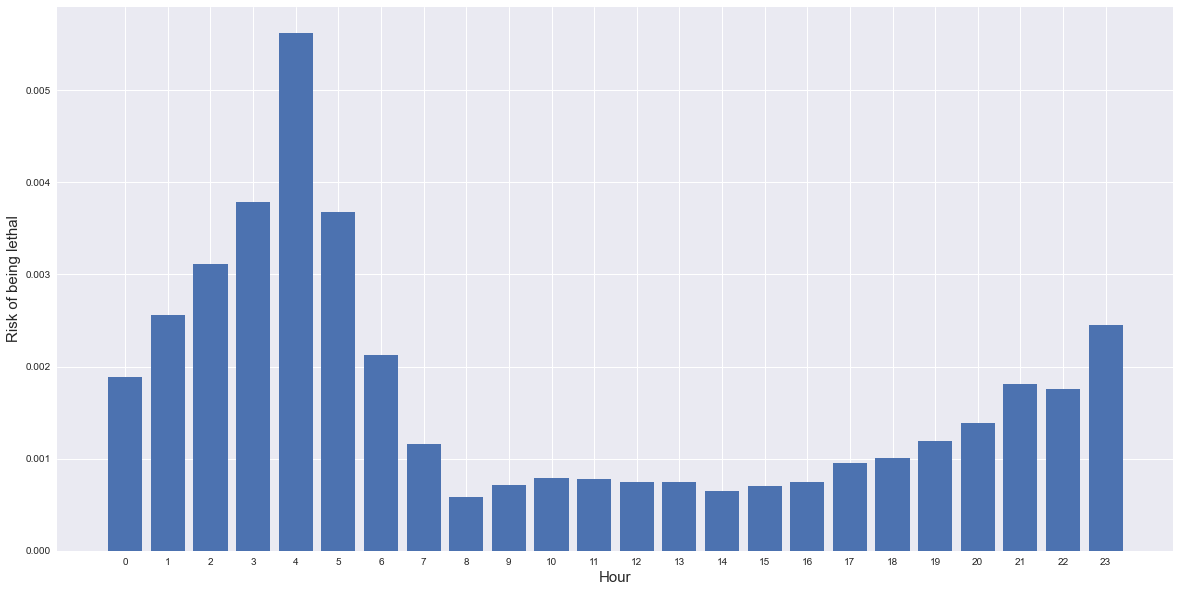

In [15]:
plt.figure(figsize=(20,10))
plt.bar(range(0, 24), df_lethal.groupby(df_lethal['CRASH TIMESTAMP'].dt.hour).size() / df.groupby(df['CRASH TIMESTAMP'].dt.hour).size())
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Risk of being lethal', fontsize=15)
plt.xticks(range(0,24))
plt.show()

In [16]:
df_lethal['CRASH TIMESTAMP'].dt.weekday

667        1
805        2
1165       3
1706       4
1891       1
          ..
1762123    0
1763645    6
1763755    2
1765238    1
1765547    3
Name: CRASH TIMESTAMP, Length: 1851, dtype: int64

### When in the week do serious accidents occur?

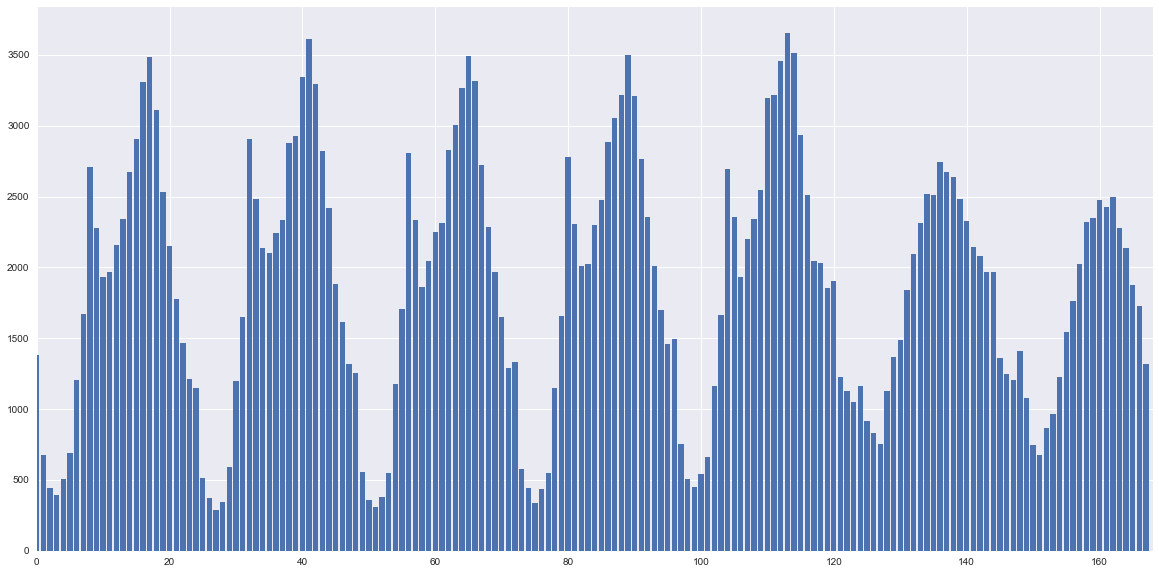

In [17]:
plt.figure(figsize=(20,10))
plt.bar(range(0,24*7), df_serious.groupby([df_serious['CRASH TIMESTAMP'].dt.weekday, df_serious['CRASH TIMESTAMP'].dt.hour]).size()
                                 .unstack().fillna(0).values.reshape(-1,))
plt.xlim(0, 24*7)
plt.show()

## Investigation into injury


In [18]:
injury_columns = [x for x in df.columns if x.startswith('NUMBER OF ')]

for injury in injury_columns:
    print(injury.title())
    n, nocc = df.groupby(injury).size().index, df.groupby(injury).size().values
    for i, j in zip(n, nocc/nocc.sum()):
        print(f'{int(i)}, {j}')
    print('')

Number Of Persons Injured
0, 0.7976347342723777
1, 0.15766959812722478
2, 0.02901464616144073
3, 0.009548993871829054
4, 0.0036027268882338347
5, 0.0014153799478841935
6, 0.0005772076263396938
7, 0.0002577508442786383
8, 0.00011119924204539758
9, 5.334992537438149e-05
10, 4.0494521669711256e-05
11, 2.1211416112705894e-05
12, 1.60692546308378e-05
13, 1.0284322963736192e-05
14, 3.21385092616756e-06
15, 4.499391296634584e-06
16, 4.499391296634584e-06
17, 2.571080740934048e-06
18, 2.571080740934048e-06
19, 1.928310555700536e-06
20, 1.285540370467024e-06
22, 1.928310555700536e-06
24, 1.928310555700536e-06
27, 6.42770185233512e-07
32, 6.42770185233512e-07
43, 6.42770185233512e-07

Number Of Persons Killed
0, 0.9988102232100962
1, 0.0011531386067463107
2, 2.8282106297010966e-05
3, 5.142201144911085e-06
4, 1.9283254293416567e-06
5, 6.427751431138856e-07
8, 6.427751431138856e-07

Number Of Pedestrians Injured
0, 0.9482208947011856
1, 0.04991509093176293
2, 0.0016409754065800993
3, 0.00017354616

### Check the Latitude and Longtitude

We might have some outliers in latitude and longitude still...

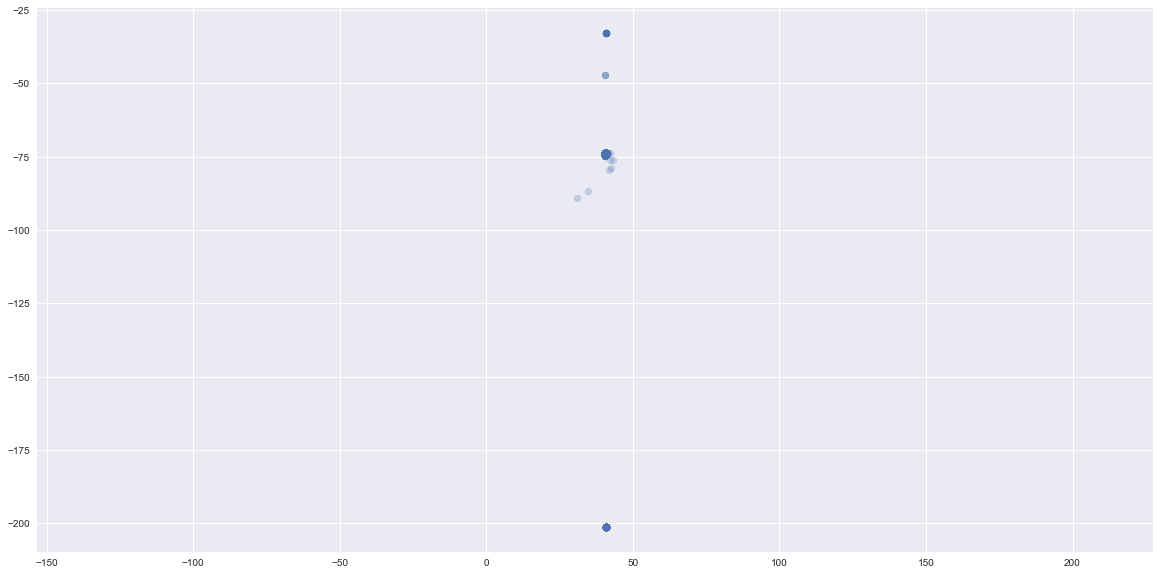

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(df['LATITUDE'], df['LONGITUDE'], alpha=0.25)
plt.axis('equal')
plt.show()

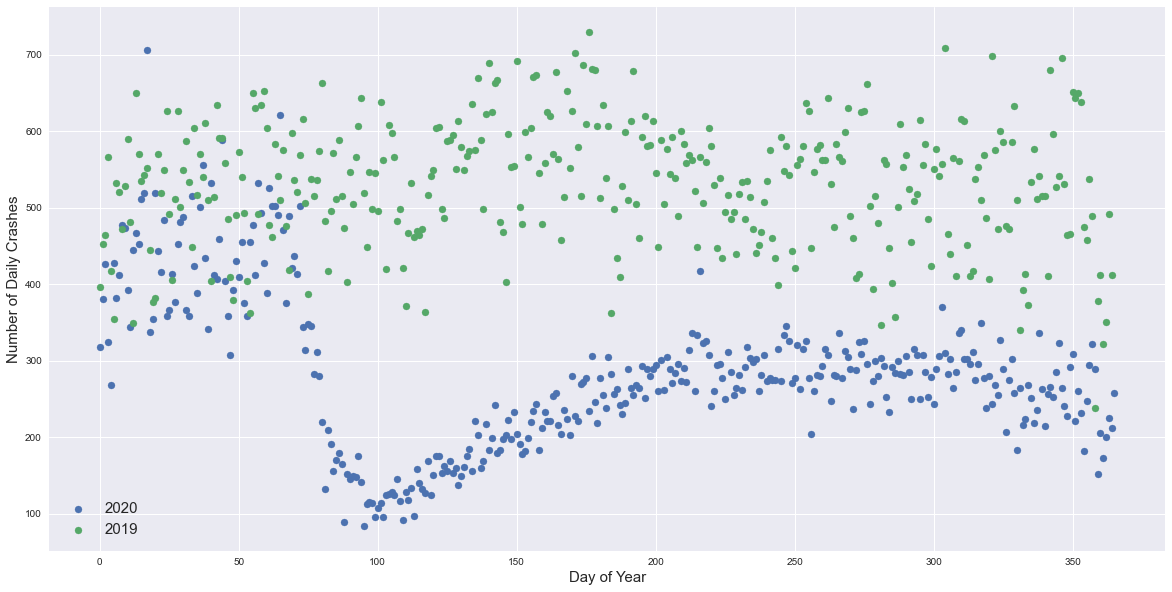

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(range(0, 366), df.loc[df['CRASH TIMESTAMP'].dt.year == 2020].groupby(df['CRASH TIMESTAMP'].dt.date).size().values, label='2020')
plt.scatter(range(0, 365), df.loc[df['CRASH TIMESTAMP'].dt.year == 2019].groupby(df['CRASH TIMESTAMP'].dt.date).size().values, label='2019')
plt.legend(fontsize=15, loc='lower left')
plt.xlabel('Day of Year', fontsize=15)
plt.ylabel('Number of Daily Crashes', fontsize=15)
plt.show()

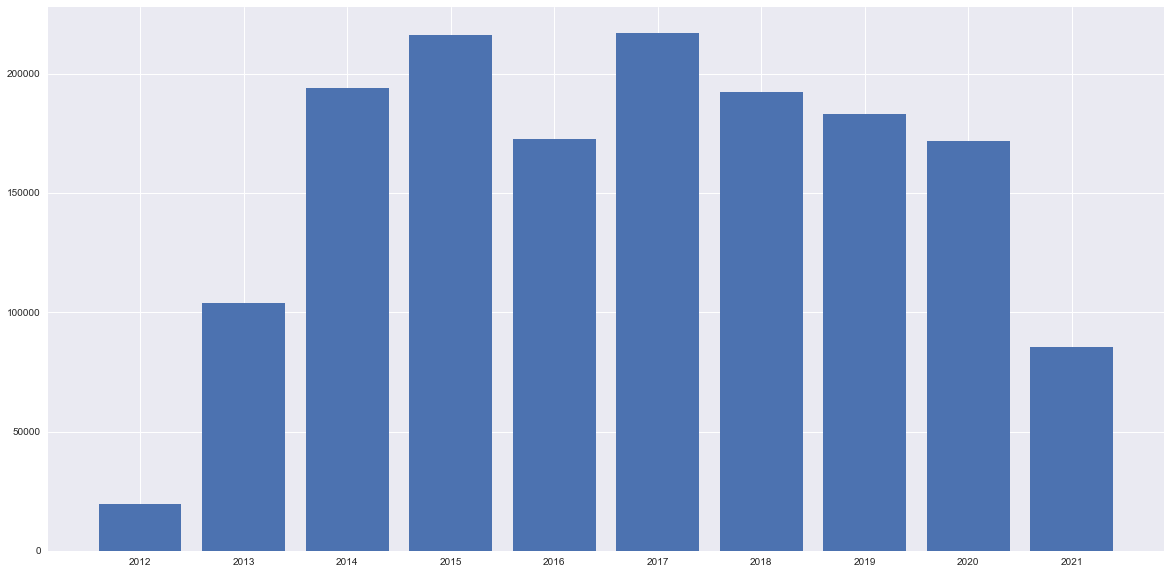

In [21]:
plt.figure(figsize=(20,10))
plt.bar((df['CRASH TIMESTAMP'].dt.year).unique(), df.groupby(df['CRASH TIMESTAMP'].dt.year).size())
plt.xticks((df['CRASH TIMESTAMP'].dt.year).unique())
plt.show()

### Which factors mix?

In [22]:
contributing_factors = np.unique(pd.read_csv('contributing_factors.csv', sep=';')['to'].to_numpy())

In [23]:
contributing_factors

array(['accelerator defective', 'aggressive driving/road rage',
       'alcohol involvement', 'animals action', 'backing unsafely',
       'brakes defective', 'cell phone', 'driver inattention/distraction',
       'driver inexperience', 'driverless/runaway vehicle', 'drugs',
       'eating or drinking', 'failure to keep right',
       'failure to yield right-of-way', 'fatigued/drowsy', 'fell asleep',
       'following too closely', 'glare', 'headlights defective',
       'illness', 'lane marking improper/inadequate',
       'listening/using headphones', 'lost consciousness',
       'obstruction/debris', 'other electronic device',
       'other lighting defects', 'other vehicular',
       'outside car distraction', 'oversized vehicle',
       'passenger distraction', 'passing or lane usage improper',
       'passing too closely', 'pavement defective', 'pavement slippery',
       'pedestrian/bicyclist/other pedestrian error/confusion',
       'physical disability', 'prescription medicati

In [24]:
i, c = df.groupby('CONTRIBUTING FACTORS').size().index, df.groupby('CONTRIBUTING FACTORS').size().values

2042